In this project you will need a VM and a text editor tool and I used Vim.
After installing snort I entered the following commands in the terminal for some folders and files that Snort requires for rules:

sudo mkdir /usr/local/etc/rules

sudo mkdir /usr/local/etc/so_rules/

sudo mkdir /usr/local/etc/lists/

sudo touch /usr/local/etc/rules/local.rules

sudo touch /usr/local/etc/lists/default.blocklist

sudo mkdir /var/log/snort

Snort as IDS
---
First I used the command *sudo vi /usr/local/etc/rules/local.rules* to get into the text editor of the rules file to end in the rule. To test out if Snort is actually working correctly I put

*alert icmp any any -> any any ( msg:"ICMP Traffic Detected"; sid:10000001; metadata:policy security-ips alert;)* 
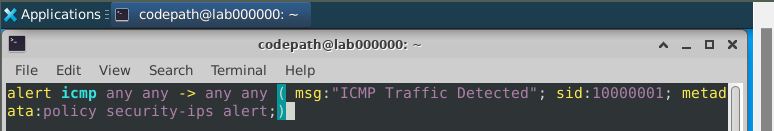

Then Snort is ran to have it load the local.rules file by using the command 
*snort -c /usr/local/etc/snort/snort.lua -R /usr/local/etc/rules/local.rules* 

You should get "Snort successfully validated the configurations" after you load your rules
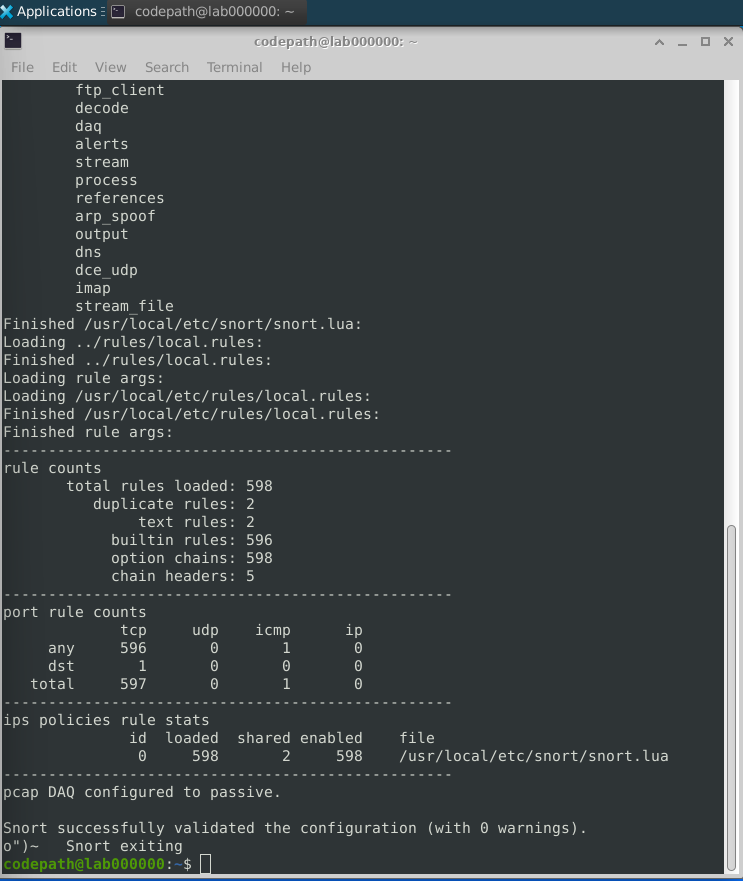

Snort is then set to detection mode to behave like an IDS (Intrusion Detection System) using the command 
*sudo snort -c /usr/local/etc/snort/snort.lua -R /usr/local/etc/rules/local.rules -i eth0 -A alert_fast -s 65535 -k none*
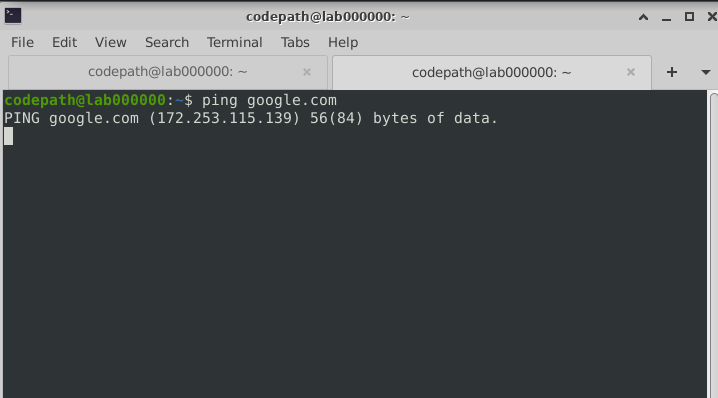
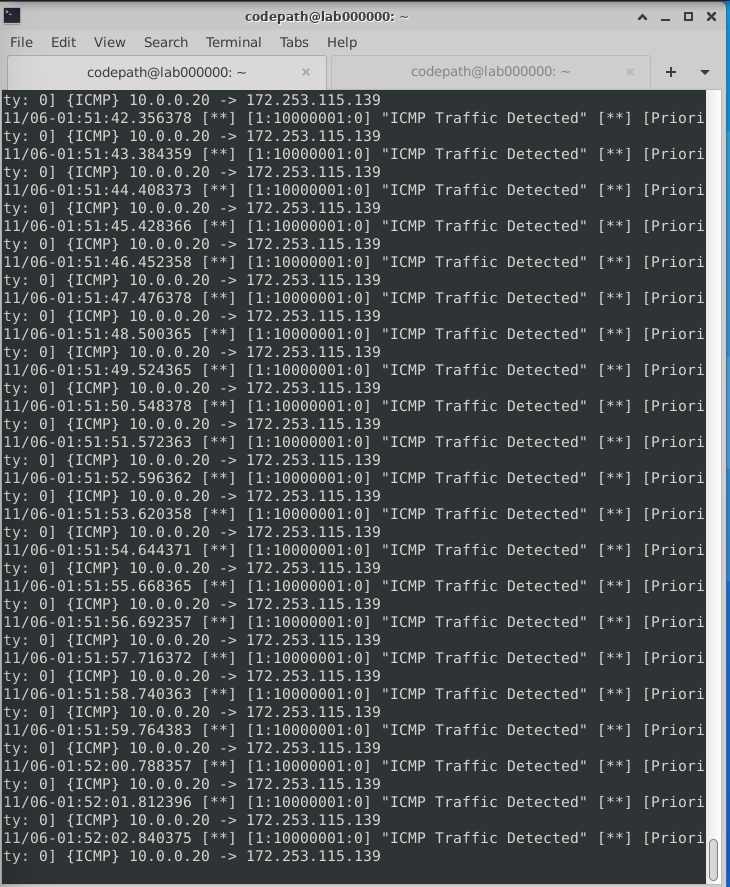

The Google IP is being pinged and we can see the respective alerts in the terminal.

Snort as IPS... *Kinda*
---

Editing the local.rules file to add the rule to "block" HTTPS (Port 443, HTTP is Port 80) traffic to Google.com using the command
*alert tcp any any -> any 443 (msg:"Blocking HTTPS traffic to google.com"; sid:1000001; rev:1;)*

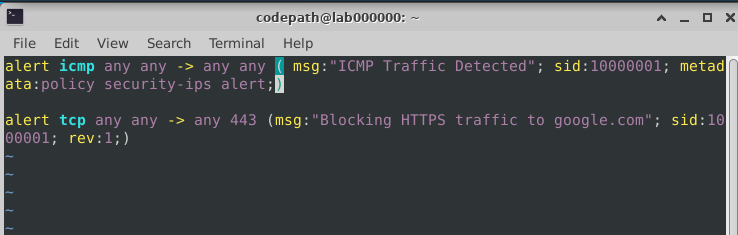

Snort is then ran in detection mode using the command 
*sudo snort -c /usr/local/etc/snort/snort.lua -i eth0 -A alert_fast -s 65535 -k none*

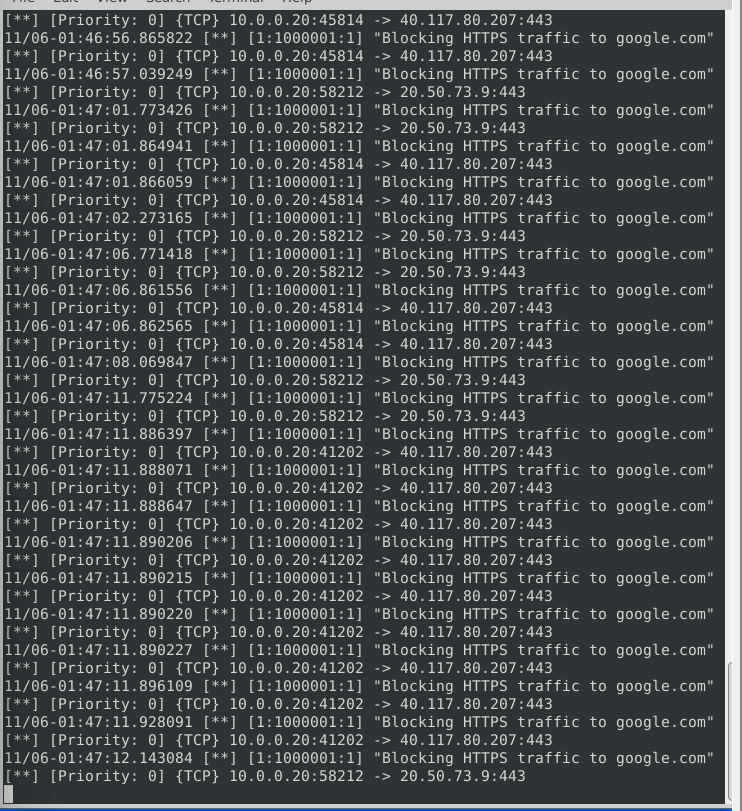

Even though I was still able to access Google, if you truly wanted to block traffic to google you can just add "drop" at the end of the command to drop the packets instead of just alerting you that the there is traffic going to Google.com. This effectively turns snort into a IPS (Intrusion Prevention System).